In [1]:
import datetime
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os #システム操作系
from pathlib import Path #ファイル操作系
from scipy.optimize import curve_fit    # フィッティング用
from scipy.stats import norm
import scipy.stats as stats

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

現在時刻： 2021-02-13 15:57:17.150392


In [2]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '210213')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/210213


In [3]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 1.0        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [4]:
experiments_file = 'exp_z=0.pkl'
#実験データ読み込み
with open(experiments_file, mode="rb") as f:
    experiments = pickle.load(f)
print(experiments.shape)

(50, 1360, 1024)


In [6]:
#ビームデータ読み込み
NUMBER = 1
data_num    = 50
data_size_x = 1360
data_size_y = 1024
experiments = np.zeros((data_num, data_size_x, data_size_y))

for i in range(data_num):
    data_path = f'/Users/nagaiyuma/Desktop/beam/{NUMBER}.csv'
    print(data_path)
    with open(data_path) as f:
        reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        experiments[i] = np.array([row for row in reader])
    NUMBER = NUMBER +1

/Users/nagaiyuma/Desktop/beam/1.csv
/Users/nagaiyuma/Desktop/beam/2.csv
/Users/nagaiyuma/Desktop/beam/3.csv
/Users/nagaiyuma/Desktop/beam/4.csv
/Users/nagaiyuma/Desktop/beam/5.csv
/Users/nagaiyuma/Desktop/beam/6.csv
/Users/nagaiyuma/Desktop/beam/7.csv
/Users/nagaiyuma/Desktop/beam/8.csv
/Users/nagaiyuma/Desktop/beam/9.csv
/Users/nagaiyuma/Desktop/beam/10.csv
/Users/nagaiyuma/Desktop/beam/11.csv
/Users/nagaiyuma/Desktop/beam/12.csv
/Users/nagaiyuma/Desktop/beam/13.csv
/Users/nagaiyuma/Desktop/beam/14.csv
/Users/nagaiyuma/Desktop/beam/15.csv
/Users/nagaiyuma/Desktop/beam/16.csv
/Users/nagaiyuma/Desktop/beam/17.csv
/Users/nagaiyuma/Desktop/beam/18.csv
/Users/nagaiyuma/Desktop/beam/19.csv
/Users/nagaiyuma/Desktop/beam/20.csv
/Users/nagaiyuma/Desktop/beam/21.csv
/Users/nagaiyuma/Desktop/beam/22.csv
/Users/nagaiyuma/Desktop/beam/23.csv
/Users/nagaiyuma/Desktop/beam/24.csv
/Users/nagaiyuma/Desktop/beam/25.csv
/Users/nagaiyuma/Desktop/beam/26.csv
/Users/nagaiyuma/Desktop/beam/27.csv
/Users/nag

In [5]:
#平均と標準偏差の計算
ave_exp = np.average(experiments, axis=0)
std_exp = np.std(experiments, axis=0)
#中心位置推定
idx = np.unravel_index(np.argmax(ave_exp), ave_exp.shape)
print(idx)

(638, 663)


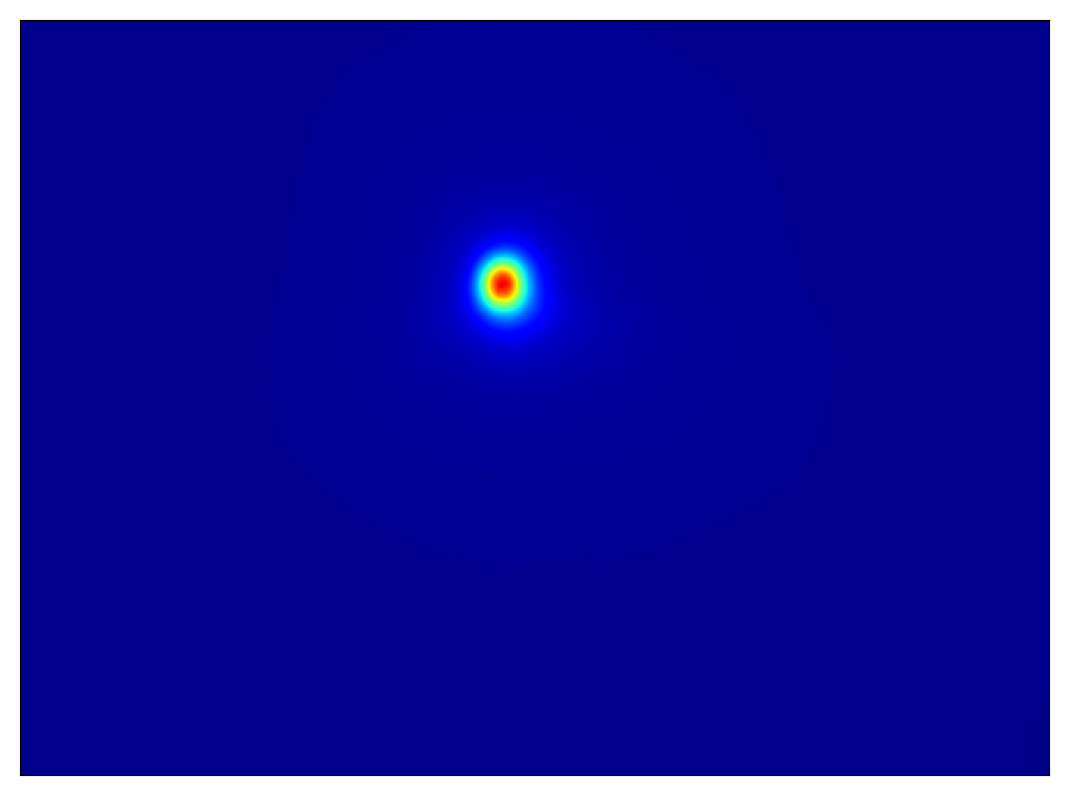

保存ファイル名： 2021-02-11_18-22_exp_cmap.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22_exp_cmap.png


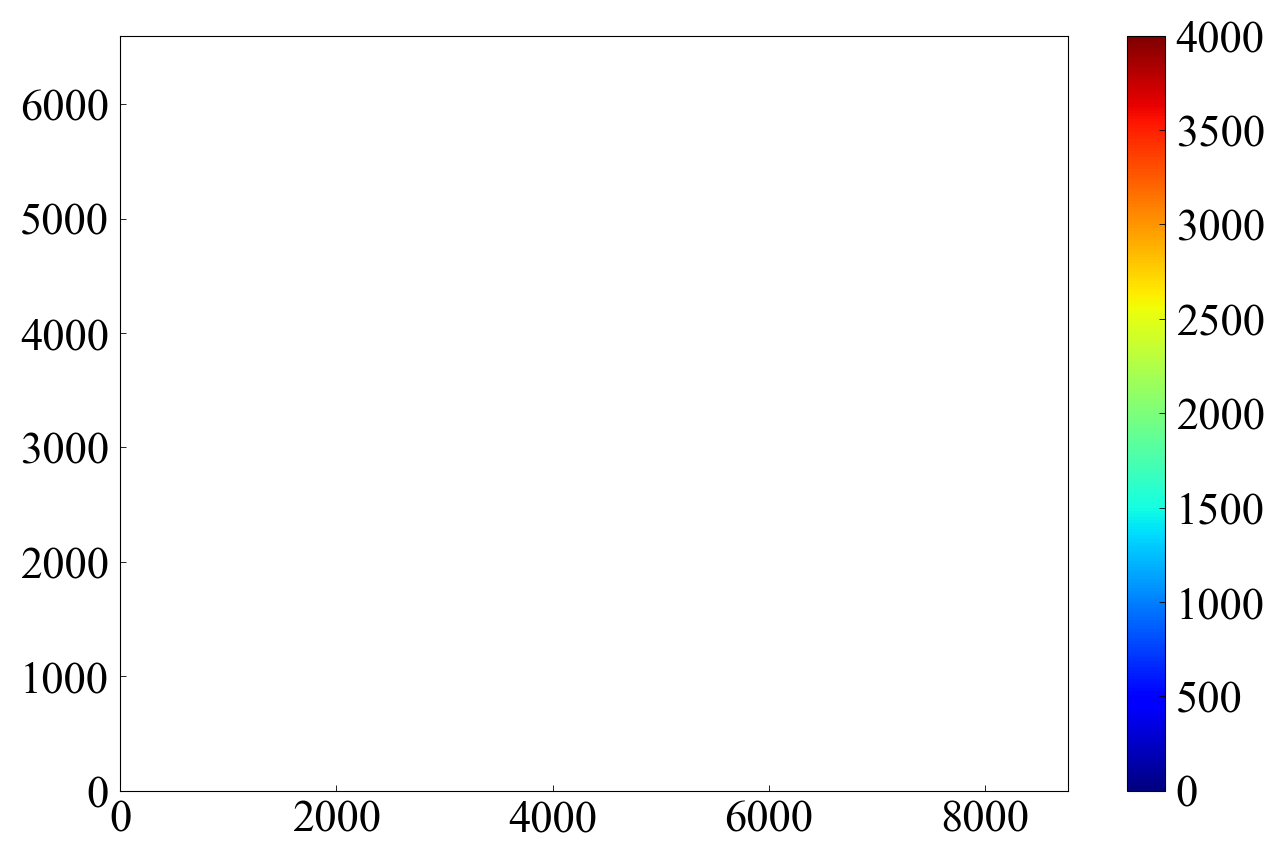

保存ファイル名： 2021-02-11_18-22_exp_ticks.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22_exp_ticks.pdf


In [111]:
x_array = np.arange(0,experiments.shape[1],1.0)*6.45
y_array = np.arange(0,experiments.shape[2],1.0)*6.45
x_grid, y_grid = np.meshgrid(x_array, y_array)
fig_size=1360/1024
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_cmap.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5*fig_size,5))
ax = fig.add_subplot(111)
ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False,
               labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
#ax.set_xlabel("x [pixel]", fontsize=16)
#ax.set_ylabel("y [pixel]", fontsize=16)
#ax.tick_params(labelsize=16)
fig.patch.set_alpha(0) #透明度
ax.patch.set_alpha(0) #透明度
mappable = ax.pcolormesh(x_grid.T, y_grid.T, ave_exp, cmap='jet', vmin=0.0, vmax=4000.0)
#cbar = fig.colorbar(mappable, ax=ax)
#cbar.set_label("Error", fontsize=16)
#cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file ,bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

fig_size=1360/1024
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_ticks.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5*fig_size+1,5))
ax = fig.add_subplot(111)
#ax.set_xlabel("x []", fontsize=16)
#ax.set_ylabel("y []", fontsize=16)
ax.set_xlim(0,x_array.max())
ax.set_ylim(0,y_array.max())
ax.tick_params(labelsize=16)
fig.patch.set_alpha(0) #透明度
ax.patch.set_alpha(0) #透明度
#ax.scatter(x_array, x_array,  color="black", label = 'x0 = 0.0',s=1.0)
#mappable = ax.pcolormesh(x_grid.T, y_grid.T,ave_exp, cmap='jet', vmin=0.0, vmax=4000.0)
cbar = fig.colorbar(mappable, ax=ax)
#cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
fig.savefig(save_file,format="pdf", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

[3457.19465776  638.20251711   46.11637114  119.63164374]


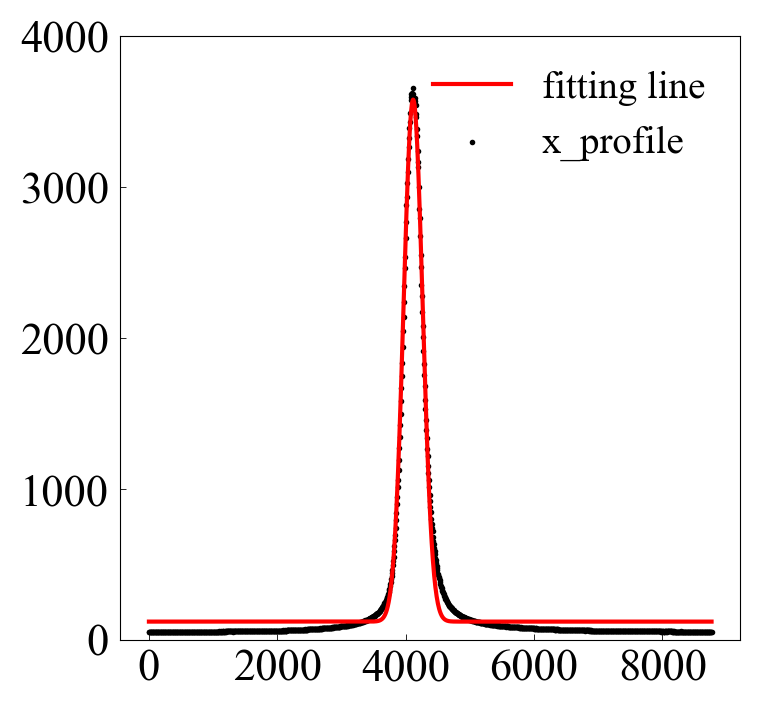

2021-02-11_18-22-beam_xprof.pdf
/Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22-beam_xprof.pdf
0.05683646942476701
[3425.73804927  664.36695285   54.74775625  124.60281521]


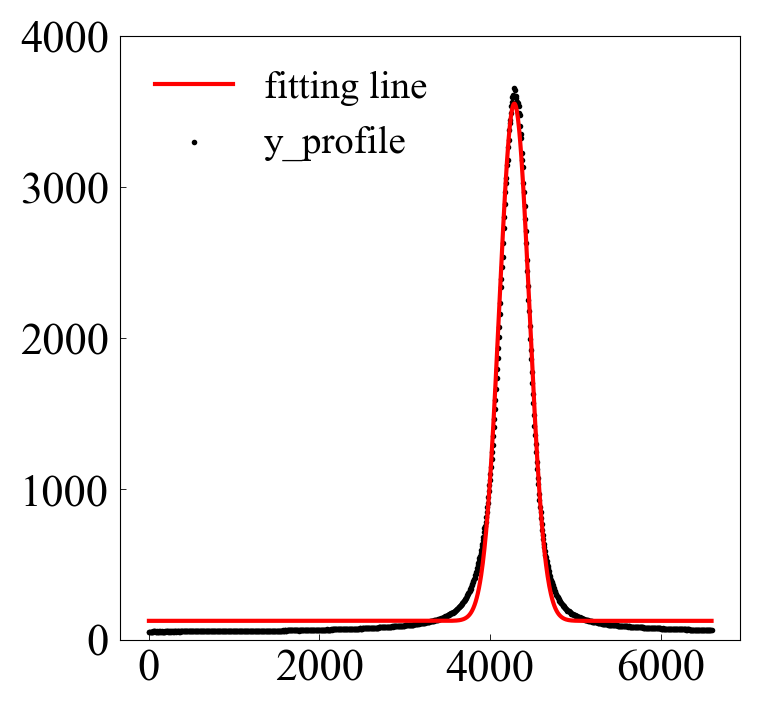

2021-02-11_18-22-beam_yprof.pdf
/Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22-beam_yprof.pdf
0.051111058001853484


In [112]:
#照射ビームプロファイル取得
x_prof = ave_exp[:,idx[1]]
y_prof = ave_exp[idx[0],:]
x_fit = range(experiments.shape[1])
y_fit = range(experiments.shape[2])

size=300
prof =x_prof[idx[0]-size:idx[0]+size]
array = np.arange(idx[0]-size,idx[0]+size,1.0)

#1Dガウシアンビームの関数の定義
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0
i0 = 1.0
x0 = idx[0]
w0 = 50.0
h0 = 0.0
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, array, prof, p0=param_ini_x, maxfev=2000)
print(param)
fit_prof = gaussian_beam(x_fit, *param)

#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'-beam_xprof.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.set_xlabel("x [pixel]", fontsize=16)
#ax.set_ylabel("    [a.u.]", fontsize=30)
ax.tick_params(labelsize=16)
ax.plot(x_array, fit_prof, color="red",label='fitting line')
ax.scatter(x_array, x_prof,  color="black",s=1.0,label='x_profile')
#ax.set_xlim(0.0,size*2)
ax.set_ylim(0,4000)
plt.xticks(np.arange(0,x_array.max(), 2000))
#plt.yticks(np.arange(ylim[0],ylim[1]+1, 10))
plt.legend(loc='upper right',frameon=False,fontsize=14)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

print((x_prof - fit_prof).max()/x_prof.max())
prof =y_prof[idx[0]-size:idx[0]+size]
array = np.arange(idx[0]-size,idx[0]+size,1.0)

i0 = 1.0
x0 = idx[1]
w0 = 50.0
h0 = 0.0
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, array, prof, p0=param_ini_x, maxfev=2000)
print(param)
fit_prof = gaussian_beam(y_fit, *param)

#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'-beam_yprof.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.xticks(np.arange(0,x_array.max(), 2000))
#ax.set_xlabel("y [pixel]", fontsize=16)
#ax.set_ylabel("    [a.u.]", fontsize=30)
ax.plot(y_array, fit_prof, color="red", label='fitting line')
ax.scatter(y_array, y_prof,  color="black",s=1.0,label='y_profile')
#ax.set_xlim(0.0,size*2)
ax.set_ylim(0,4000)
plt.tick_params(labelsize=16)
plt.legend(loc='upper left',frameon=False,fontsize=14)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)
print((y_prof - fit_prof).max()/y_prof.max())

In [6]:
#プロファイル取得
profiles = experiments[:,:,idx[1]]
print(profiles.shape)
#サイズ抽出
size=100
prof =profiles[:,idx[0]-size:idx[0]+size]
ave_prof = np.average(prof, axis=0)
std_prof = np.std(prof, axis=0)
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列

(50, 1360)


[3377.94664247  638.14281744   43.55332799  244.78337125]


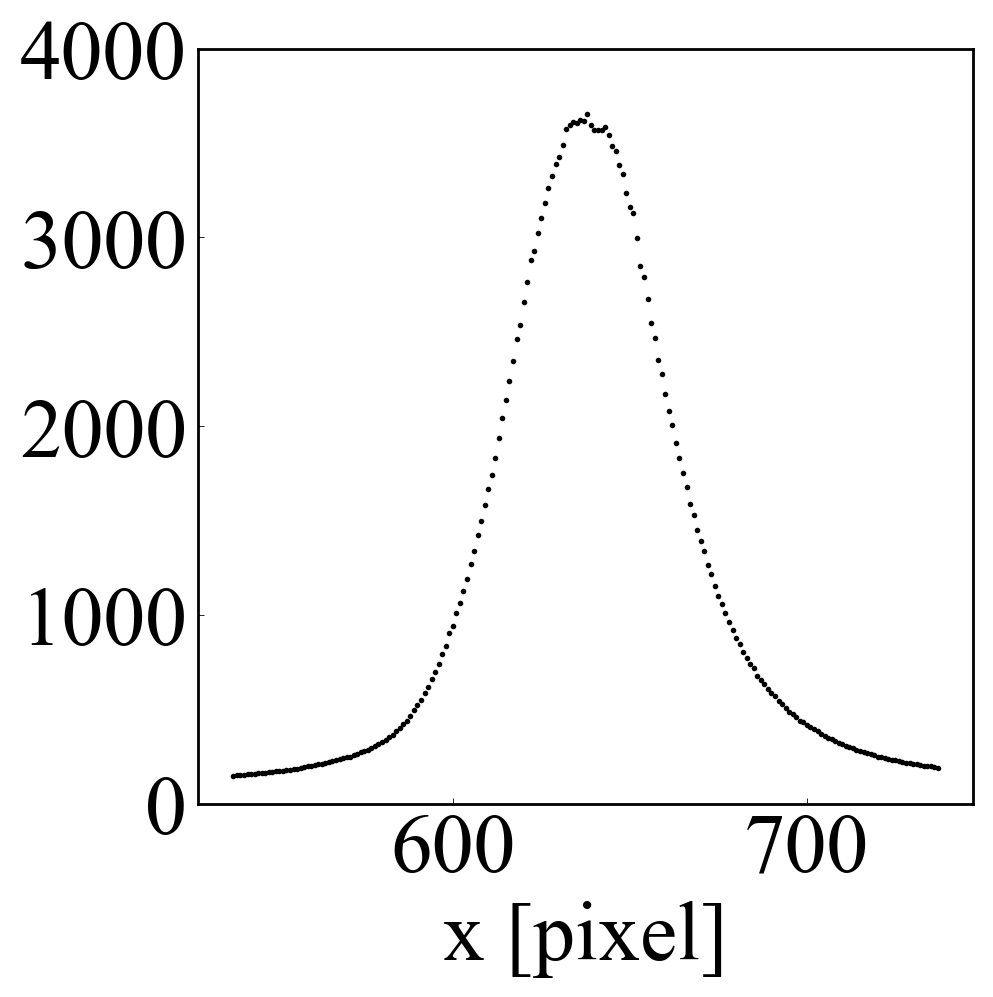

2021-02-13_15-57_prof-exp.pdf
/Users/nagaiyuma/Documents/myprogram/210213/2021-02-13_15-57_prof-exp.pdf


In [7]:
#1Dガウシアンビームの関数の定義
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0
i0 = 4000.0
x0 = idx[0]
w0 = 50.0
h0 = 0.0

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, x_array, ave_prof, p0=param_ini_x, maxfev=2000)
print(param)
fit_prof = gaussian_beam(x_array, *param)

prof_i0 = param[0]
prof_x0 = param[1]
prof_w0 = param[2]
prof_h0 = param[3]

#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_prof-exp.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("    [a.u.]", fontsize=30)
#ax.plot(x_array, fit_prof, color="red")
ax.scatter(x_array, ave_prof,  color="black", label = 'x0 = 0.0',s=1.0)
#ax.set_xlim(0.0,size*2)
ax.set_ylim(0,4000)
plt.tick_params(labelsize=30)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

In [115]:
#パラメータ保存
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fit-profiles.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(param, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

保存ファイル名： 2021-02-11_18-22_fit-profiles.pkl
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22_fit-profiles.pkl


In [8]:
#オフセット処理
prof_h = prof - param[3]
profile_h = profiles -param[3]

In [9]:
#正規化
prof_h = prof_h / prof_h.max()
profile_h = profile_h / profile_h.max()

ave_prof = np.average(prof_h, axis=0)
std_prof = np.std(prof_h, axis=0)

In [10]:
i0 = 1.0
x0 = 100
w0 = 50.0
h0 = 0.0
x_array = np.arange(0, 2*size, 1.0)                         # x配列

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, x_array, ave_prof, p0=param_ini_x, maxfev=2000)
print(param)
fit_prof = gaussian_beam(x_array, *param)
i0 = param[0]
x0 = param[1]
w0 = param[2]
h0 = param[3]
fit_prof = gaussian_beam(x_array, *param)

[ 9.71171930e-01  1.00142827e+02  4.35533825e+01 -3.71519613e-07]


In [120]:
i0 = 1.0
x0 = 100
w0 = 50.0
h0 = 0.0
x_array = np.arange(0, 2*size, 1.0)                         # x配列
parameters = np.zeros((50,2))
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
for i in range(50):
    param, cov  = curve_fit(gaussian_beam, x_array, prof_h[i], p0=param_ini_x, maxfev=2000)
    print(param)
    parameters[i][0] = param[1]
    parameters[i][1] = param[2]

ave_x0 = np.average(parameters.T[0])
std_x0 = np.std(parameters.T[0])
ave_w0 = np.average(parameters.T[1])
std_w0 = np.std(parameters.T[1])

[9.70205786e-01 1.00143366e+02 4.35187695e+01 5.05717578e-05]
[ 9.68026415e-01  1.00121253e+02  4.35578504e+01 -2.21056234e-05]
[ 9.7168892e-01  1.0021338e+02  4.3561712e+01 -1.5253352e-04]
[ 9.70891246e-01  1.00177828e+02  4.36870306e+01 -4.90164712e-04]
[9.70550987e-01 1.00179590e+02 4.35805856e+01 4.18713811e-05]
[9.72200287e-01 1.00108823e+02 4.34738185e+01 2.49030745e-04]
[ 9.72789228e-01  1.00124657e+02  4.35314683e+01 -1.12269697e-05]
[9.69953254e-01 1.00145113e+02 4.35023456e+01 2.32121848e-04]
[ 9.74315396e-01  1.00181375e+02  4.35140336e+01 -3.28308740e-04]
[9.69305153e-01 1.00094488e+02 4.35868601e+01 5.93705897e-05]
[ 9.70453775e-01  1.00098254e+02  4.35598570e+01 -5.27990406e-05]
[ 9.70206176e-01  1.00146188e+02  4.36140045e+01 -3.58924056e-04]
[ 9.70041556e-01  1.00124608e+02  4.36738374e+01 -1.42876938e-04]
[ 9.70849628e-01  1.00140911e+02  4.35333145e+01 -1.50315095e-04]
[ 9.68703105e-01  1.00109224e+02  4.36306496e+01 -2.64786018e-04]
[ 9.68555367e-01  1.00167633e+02  

In [121]:
print(ave_x0,std_x0)
print(ave_w0,std_w0)

100.14281094631116 0.03687031373284162
43.55318696458139 0.06419443984437552


In [13]:
#パラメータ保存
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fit-param.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(param, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

保存ファイル名： 2021-02-11_18-22_fit-param.pkl
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210202/2021-02-11_18-22_fit-param.pkl


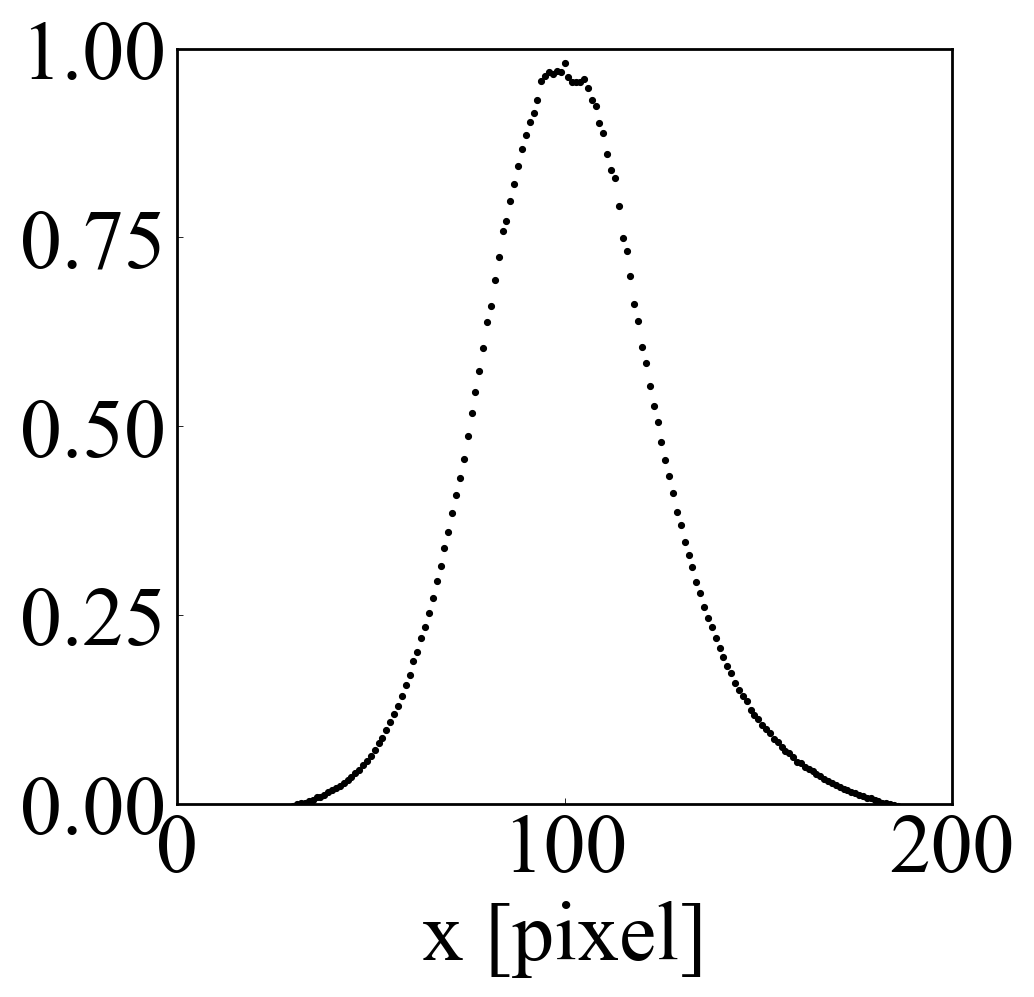

2021-02-13_15-57_prof-exp.pdf
/Users/nagaiyuma/Documents/myprogram/210213/2021-02-13_15-57_prof-exp.pdf


In [13]:
#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_prof-exp.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("    [a.u.]", fontsize=30)
#ax.plot(x_array, fit_prof, color="red")
ax.scatter(x_array, ave_prof,  color="black", label = 'x0 = 0.0',s=2.5)
ax.set_xlim(0.0,size*2)
ax.set_ylim(0,1.0)
plt.tick_params(labelsize=30)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

In [14]:
#データ書き込み
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_exp-prof.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(prof_h, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2021-01-20 19:20:59.671971
保存ファイル名： 2021-01-20_19-20_exp-prof.pkl
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210120/2021-01-20_19-20_exp-prof.pkl


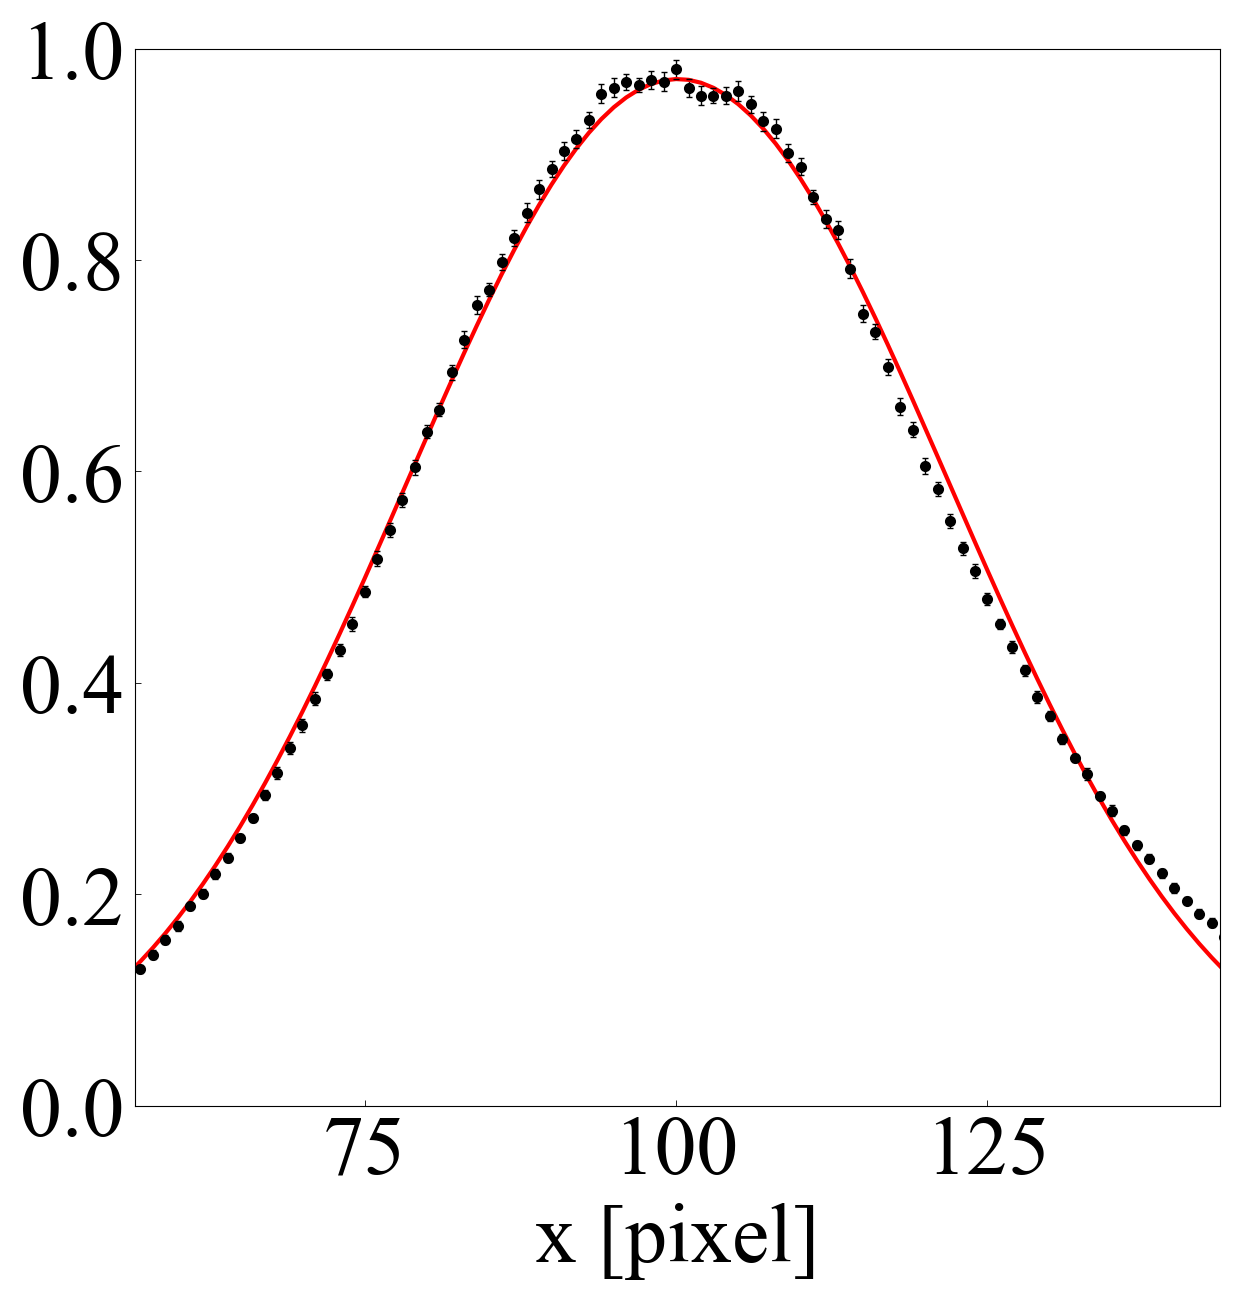

2021-01-27_17-04_-w0+w0.pdf
/Users/nagaiyuma/Documents/myprogram/210127/2021-01-27_17-04_-w0+w0.pdf


In [13]:
#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_-w0+w0.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("    [a.u.]", fontsize=30)
ax.plot(x_array, fit_prof, color="red")
#ax.scatter(x_array, ave_prof,  color="black", label = 'x0 = 0.0',s=1.0)
ax.errorbar(x_array, ave_prof, yerr = std_prof, 
            capsize=1, capthick=0.5, fmt='o', markersize=3, 
            elinewidth=0.5 , ecolor='black', 
            mfc='black',mec = "black",label='90-110')
ax.set_xlim(x0-w0,x0+w0)
ax.set_ylim(0,1.0)
plt.tick_params(labelsize=30)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

In [13]:
#サイズ抽出
print(ave_prof.shape)
print(int(param[1]-param[2]))
ave_prof = ave_prof[int(x0-w0):int(x0+w0)]
std_prof = std_prof[int(x0-w0):int(x0+w0)]

(200,)
56


In [14]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#非線形Fの関数
def fit_func(x,p,q):
    return np.sqrt(x*p)+q
#非線形フィッティング
param_ini = np.array([0.001,0])
param, cov  = curve_fit(fit_func, ave_prof, std_prof, p0=param_ini, maxfev=2000)
c1 = f'{param[0]:.7f}'
d1 = f'{param[1]:.5f}'
print(f'y = √{c1}x+{d1}')

#非線形Fの関数
def fit_func(x,p):
    return np.sqrt(x*p)
#非線形フィッティング
param_ini = np.array([0.001])
param, cov  = curve_fit(fit_func, ave_prof, std_prof, p0=param_ini, maxfev=2000)
c1 = f'{param[0]:.7f}'
#d1 = f'{param[1]:.5f}'
print(f'y = √{c1}x')

x_array = np.arange(0, 1.0, 0.01)                         # x配列
fitting2 = fit_func(x_array, *param)

現在時刻： 2021-02-02 18:17:38.041419
y = √0.0000658x+0.00050
y = √0.0000765x


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


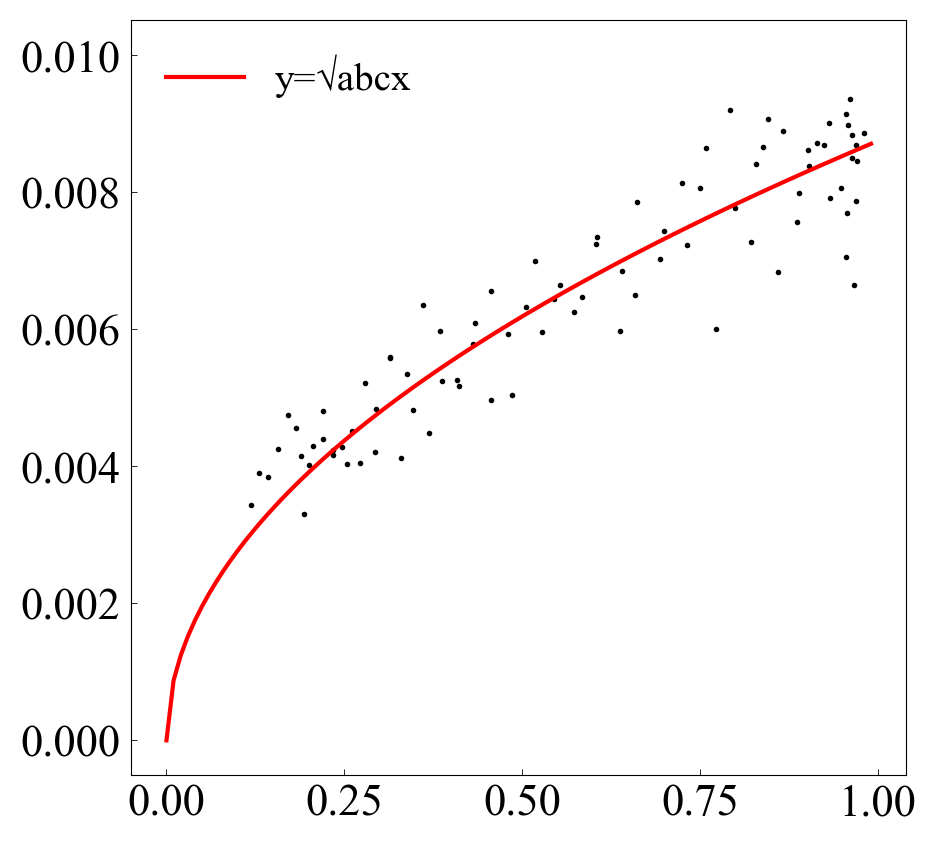

保存ファイル名： 2021-02-02_18-17_ave-std.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210202/2021-02-02_18-17_ave-std.pdf


In [15]:
#グラフ
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave-std.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#ax.set_xlabel("Average of intensity", fontsize=16)
#ax.set_ylabel("Standard diviation of intensity", fontsize=16)
#ax.set_xlim(-0.0,1.0)
#ax.set_ylim(0.0,0.012)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(ave_prof, std_prof, color='black', s=1)
ax.plot(x_array, fitting2, color='red',label='y=√abcx')
plt.legend(frameon=False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [17]:
print(profile_h.shape)
prof1 = profile_h[:,int(prof_x0+size):int(prof_x0+3*size)]
ave_prof1 = np.average(prof1, axis=0)
std_prof1 = np.std(prof1, axis=0)
x_array1 = np.arange(0,2*size, 1.0)                         # x配列

prof2 = profile_h[:,int(prof_x0-size):int(prof_x0+3*size)]
ave_prof2 = np.average(prof2, axis=0)
std_prof2 = np.std(prof2, axis=0)
x_array2 = np.arange(0,4*size, 1.0)                         # x配列

(50, 1360)


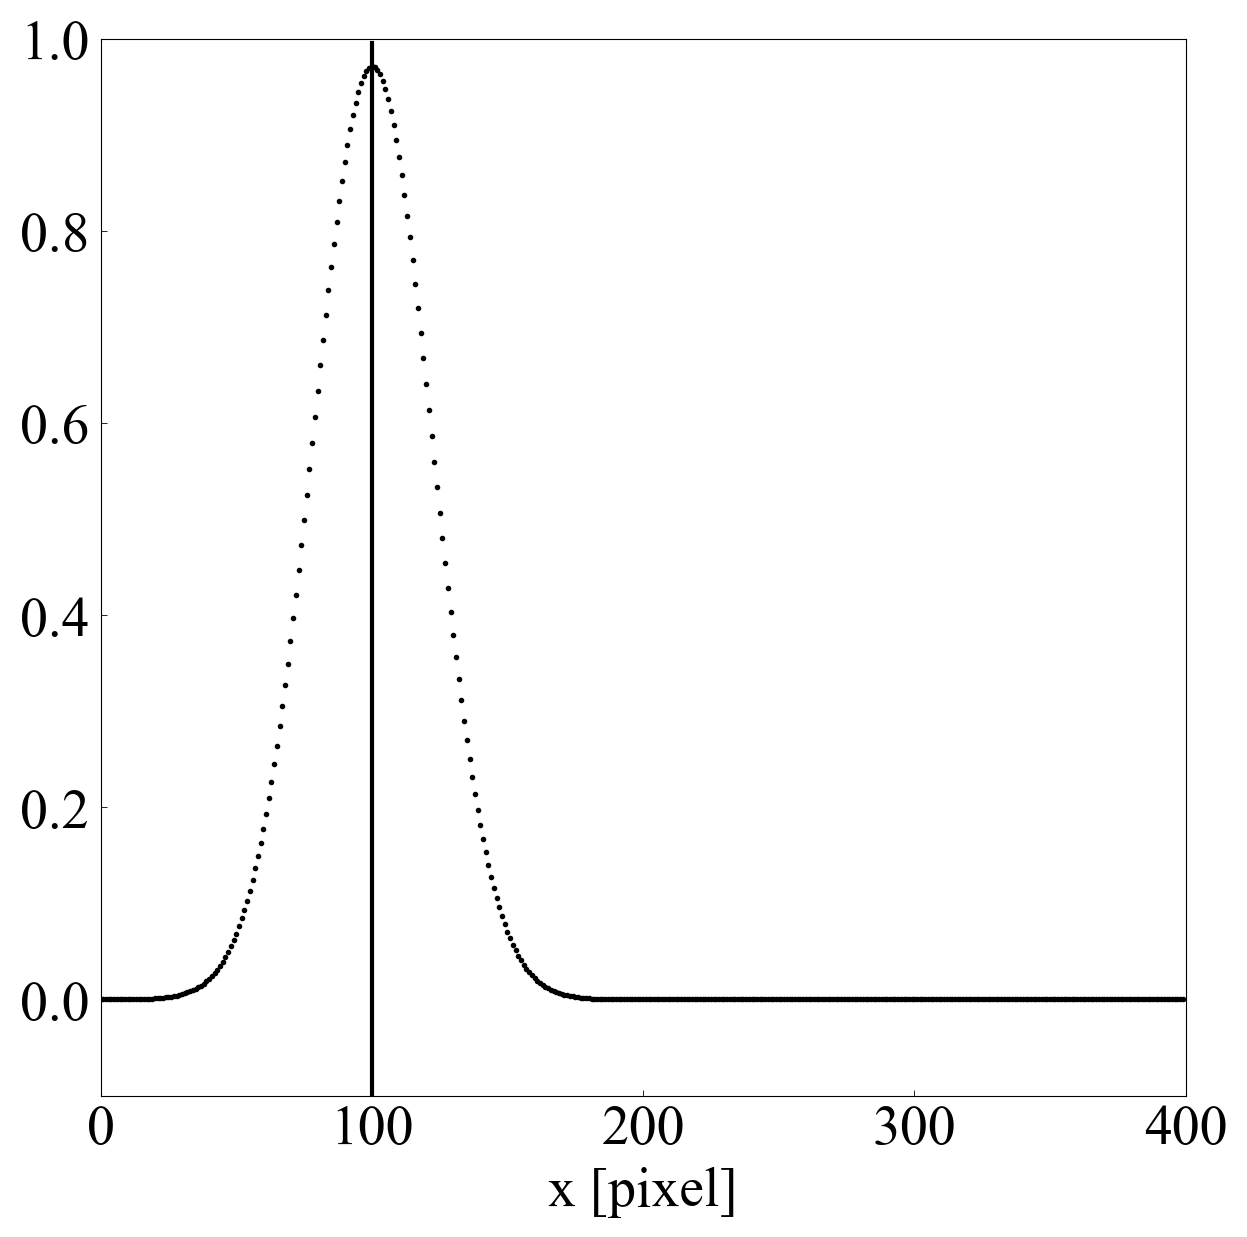

2021-02-11_18-22_prof0-400.pdf
/Users/nagaiyuma/Documents/myprogram/210202/2021-02-11_18-22_prof0-400.pdf


In [18]:
fit_prof = gaussian_beam(x_array2, i0,x0,w0,h0)
#表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_prof0-400.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlabel("x [pixel]", fontsize=20)
#ax.set_ylabel("    [a.u.]", fontsize=30)
ax.scatter(x_array2,fit_prof, color='black',s=1.0)
ax.plot(x0.repeat(400),x_array2/200-1,color='black')
#ax.scatter(x_array2, ave_prof2,  color="black", label = 'x0 = 0.0',s=1.0)
ax.set_xlim(0.0,size*4)
ax.set_ylim(-0.1,1.0)
plt.tick_params(labelsize=20)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_name)
print(save_file)

In [19]:
print(x0)
print(w0)
print(x0+2*w0)

100.14282714298128
43.55338247912098
187.24959210122324


[ 7.12159100e+00 -1.24949989e-03  1.25171184e-02]


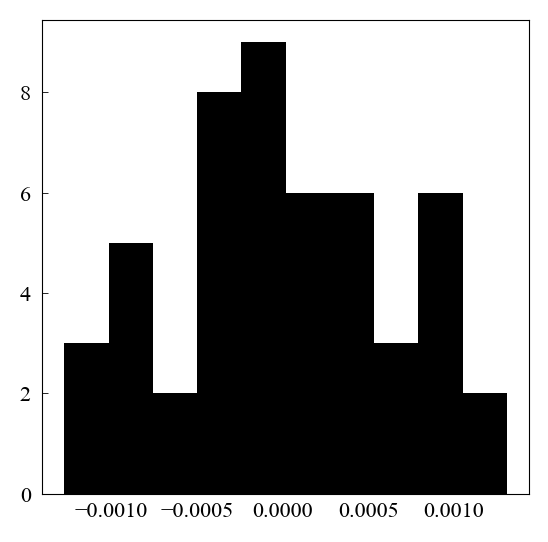

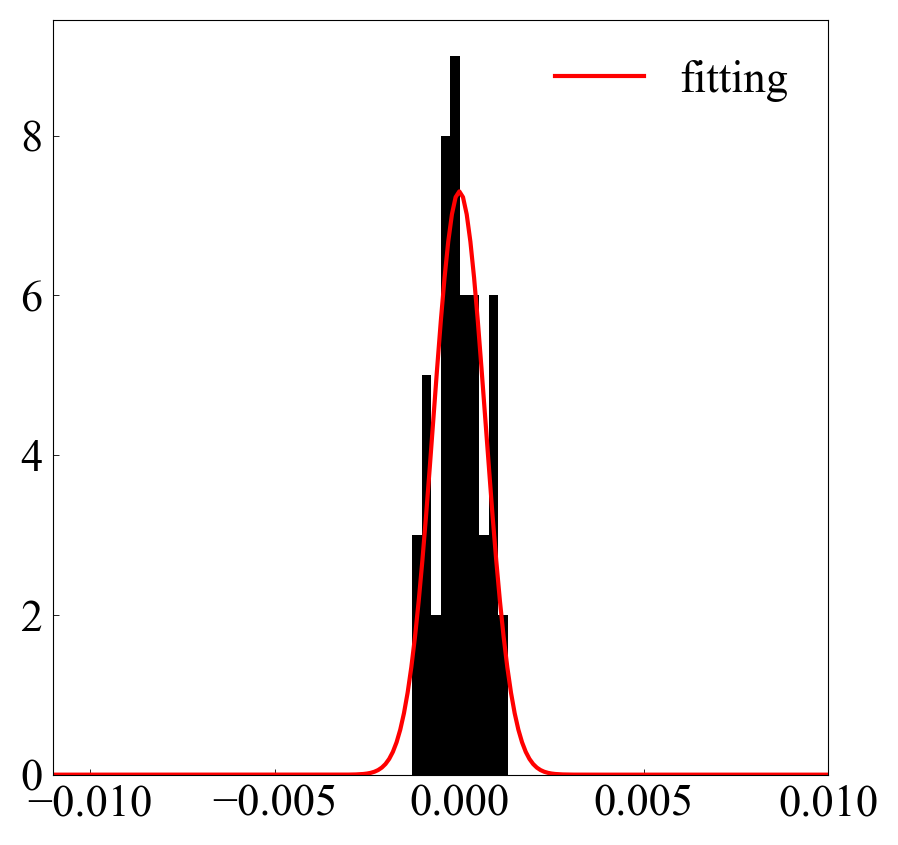

保存ファイル名： 2021-02-11_18-22_hist_x=300.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22_hist_x=300.pdf


In [96]:
#x=2w_0のヒストグラム
#w = 100
#hist = np.zeros((w,50))
#for i in range(w):
#    hist = profile_h[:,int(prof_x0+300+i)]-np.average(profile_h[:,int(prof_x0+300+i)])
#    param = norm.fit(hist)
#    print(hist.shape)
#hist = hist.flatten()
#1Dガウシアンビームの関数の定義
def gaussian(x,i0,x0,w0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2)

hist = profile_h[:,int(prof_x0+300+6)]-np.average(profile_h[:,int(prof_x0+300+6)])
i0 = 10
x0 = 0
w0 = 0.001
x_list = np.arange(-0.01, 0.01, 0.002)                         # x配列
y_list = np.array(plt.hist(hist, bins=10, color='black')[0])
param_ini_x = np.array([i0, x0, w0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian, x_list, y_list, p0=param_ini_x, maxfev=2000)
print(param)
#param = np.array([i0, x0, w0, h0])
x_array = np.arange(-0.01,0.01,0.0001)
fit_prof = gaussian(x_array, *param)
x = np.arange(-0.1,0.1, 0.0001)
param = norm.fit(hist)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])*(ax.hist(hist, bins=10, color='black')[0].max())/(ax.hist(hist,density=1, color='black')[0].max())

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist_x=300.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.tick_params(labelsize=16)
ax.hist(hist, bins=10, color='black')
ax.plot(x, pdf_fitted, c='red',label='fitting')
#ax.plot(x_array, fit_prof, c='red', label='fitting ')
plt.legend(frameon=False,loc='upper right',fontsize=16)
#plt.xlabel('Δn')
#plt.ylabel('Probability')
plt.xlim(-0.011,0.01)
#plt.ylim(0.0, 15.0)
plt.savefig(save_file,format='pdf',bbox_inchs='tight')
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

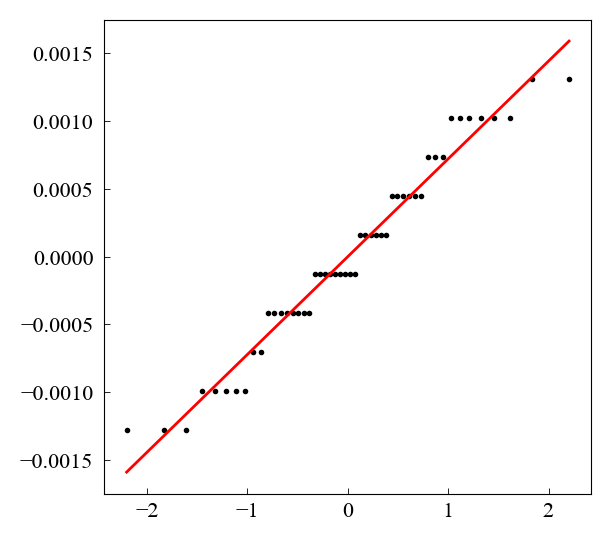

正規分布である


In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(hist, dist="norm", plot=plt)
ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel(None)
#ax.set_xlim(-2,2)
#ax.set_ylim()
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markerfacecolor('black')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_linewidth(1.0)
plt.show()

if stats.shapiro(hist)[1]>0.05:
    print('正規分布である')
else:
    print('正規分布でない')
    print(stats.shapiro(hist))

In [21]:
w = int(700)
std_list = np.zeros(w)
for i in range(w):
    hist = profile_h[:,int(prof_x0+i)]-np.average(profile_h[:,int(prof_x0+i)])
    param = norm.fit(hist)
    std_list[i] = param[1]
x_array = x0 + range(w)

print(np.average(std_list[300:400]))

0.001106333742727549


No handles with labels found to put in legend.


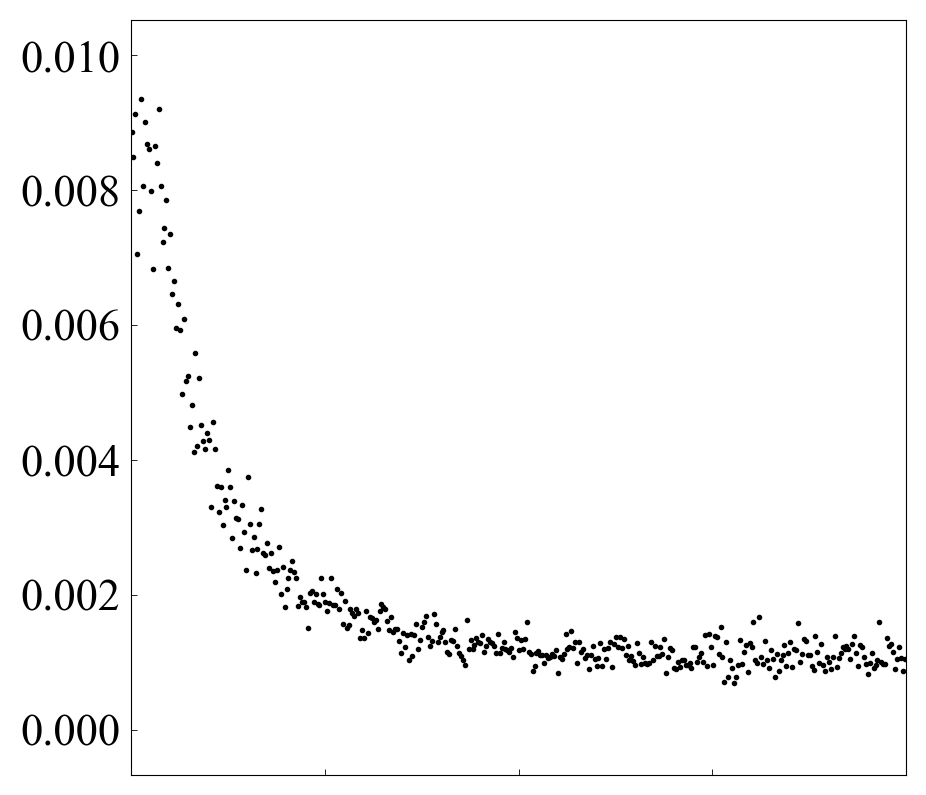

保存ファイル名： 2021-02-02_18-17_x-std.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210202/2021-02-02_18-17_x-std.pdf


In [24]:
#グラフ
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_x-std.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#ax.set_xlabel("Average of intensity", fontsize=16)
#ax.set_ylabel("Standard diviation of intensity", fontsize=16)
ax.set_xlim(x0,500.0)
#ax.set_ylim(0.0,0.012)
plt.xticks(np.arange(100,501, 100))
#plt.yticks(np.arange(ylim[0],ylim[1]+1, 10))
plt.tick_params(labelsize=16)
ax.grid(False)
#ax.tick_params(bottom=False)
ax.tick_params(labelbottom=False)
ax.scatter(x_array, std_list, color='black', s=1)
#ax.plot(x_array, fitting2, color='red',label='y=√abcx')
#ax.set_ylim(0.0005,0.0019)
plt.legend(frameon=False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [12]:
i0 = 1.0
x0 = 100
w0 = 50.0
h0 = 0.0
x_array = np.arange(0, 2*size, 1.0)                         # x配列

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param, cov  = curve_fit(gaussian_beam, x_array, prof_h[i], p0=param_ini_x, maxfev=2000)
print(param)
fit_prof = gaussian_beam(x_array, *param)
i0 = param[0]
x0 = param[1]
w0 = param[2]
h0 = param[3]
fit_prof = gaussian_beam(x_array, *param)

[ 9.71171930e-01  1.00142827e+02  4.35533825e+01 -3.71519613e-07]


(-8.881784197001253e-17, 0.008859123704666984)
12.0
61.380293448468535


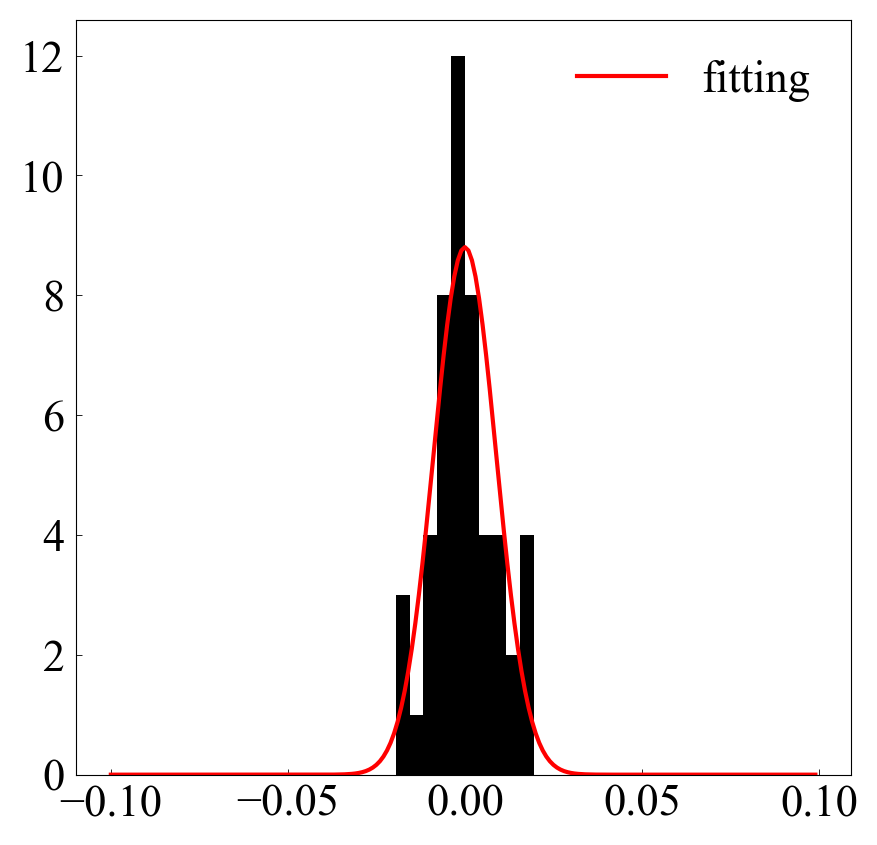

保存ファイル名： 2021-02-11_18-22_hist_x=x0.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210211/2021-02-11_18-22_hist_x=x0.pdf


In [97]:
#x=x_0のヒストグラム
hist = profile_h[:,int(prof_x0)]-np.average(profile_h[:,int(prof_x0)])

#正規分布フィティング
param_ini = np.array([4, 0, 0.01])
x = np.arange(-0.1,0.1, 0.001)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])*(ax.hist(hist, bins=10, color='black')[0].max())/(ax.hist(hist,density=1, color='black')[0].max())

print(ax.hist(hist, bins=10, color='black')[0].max())
print(ax.hist(hist,density=1, color='black')[0].max())
# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist_x=x0.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(x, pdf_fitted, c='red',label='fitting')
ax.hist(hist, bins=10, color='black')
#plt.xlabel('Δn')
#plt.ylabel('Probability')
#plt.xlim(-0.01,0.01)
#plt.ylim(0.0, 15.0)
plt.legend(frameon=False,loc='upper right',fontsize=16)
ax.tick_params(labelsize=16)
plt.savefig(save_file,format='pdf',bbox_inchs='tight')
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

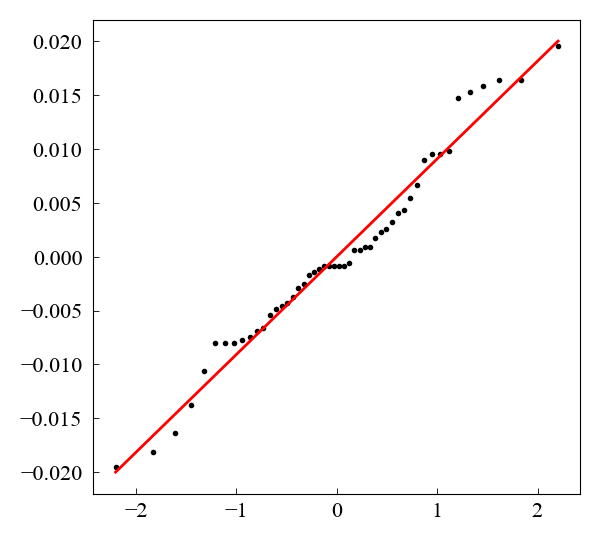

正規分布である
(0.9721464514732361, 0.28238677978515625)


In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(hist, dist="norm", plot=plt)
ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markeredgecolor('black')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_linewidth(1.0)
plt.show()

if stats.shapiro(hist)[1]>0.05:
    print('正規分布である')
    print(stats.shapiro(hist))
else:
    print('正規分布でない')

(0.0001299277965422792, 0.001552350984958072)


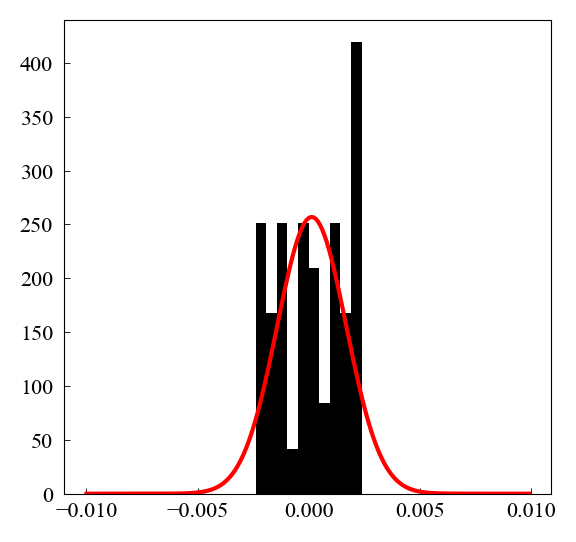

保存ファイル名： 2021-01-20_19-21_hist_x=2w0.pdf
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/210120/2021-01-20_19-21_hist_x=2w0.pdf


In [39]:
hist = (np.random.rand(50)-0.5)*0.005   #プラスマイナスNOISE%のノイズ(一様分布),
#正規分布フィティング
param_ini = np.array([4, 0, 0.001])
x = np.arange(-0.01,0.01, 0.0001)
param = norm.fit(hist)
print (param)
pdf_fitted = norm.pdf(x,loc=param[0], scale=param[1])
pdf = norm.pdf(x)

# ヒストグラムのグラフを作成
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_hist_x=2w0.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
plt.figure()
plt.plot(x, pdf_fitted, c='red')
plt.hist(hist, density=1, color='black')
#plt.xlabel('Δn')
#plt.ylabel('Probability')
#plt.xlim(-0.01,0.01)
#plt.ylim(0.0, 15.0)
#plt.savefig(save_file)
plt.show()
plt.close()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

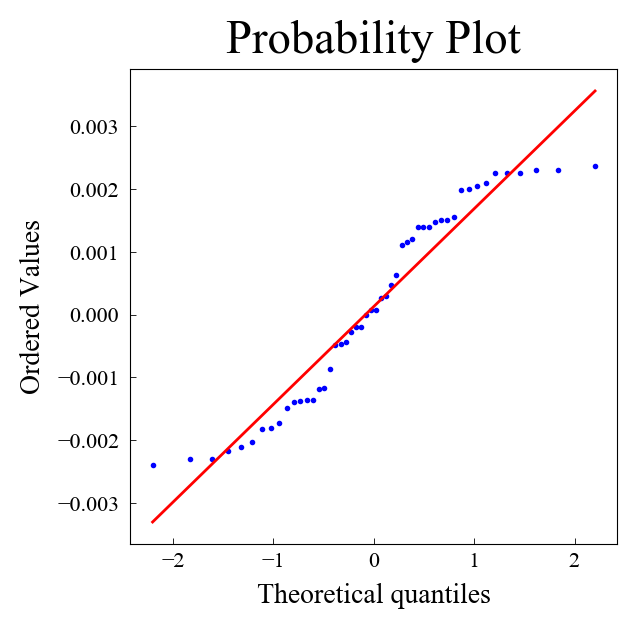

正規分布でない


In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(hist, dist="norm", plot=plt)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markerfacecolor('r')
ax.get_lines()[0].set_markersize(1.0)
ax.get_lines()[1].set_linewidth(1.0)
plt.show()

if stats.shapiro(hist)[1]>0.05:
    print('正規分布である')
    print(stats.shapiro(hist))
else:
    print('正規分布でない')